_Data Story Date: 2020-10-02_; _Data last updated on 2020-11-02_

# One Ring To Rule Them All

## Tracking Weight Changes with the Scale, Apple Watch and the iPhone Health App


[Close Your Rings](https://www.apple.com/watch/close-your-rings/) is a practice that is familiar to many Apple Watch wearers. There are three rings that represent daily goals. They are:

-  Move Ring

    The number of active calories to burn per day. The number is set by the user.
      

-  Exercise Ring

    The number of exercise minutes per day. Apple sets the goal to 30 minutes. Apple defines exercise as a brisk activity.
      
      
-  Stand Ring

    Apple says that the Stand Ring "measures how often your stand up and move around over the course of 12 hours."
      
    
    
The Apple Watch measures the move-calories burned, the exercise minutes, and the number of times one stands up and moves during the day. It syncs these data with the iPhone's Health App. Other data that the Apple Watch transmits to the the Health app include heart rate and steps. The iPhone Health App takes these data and displays them graphically in daily, weekly, monthly and annual views. These graphical charts provide a good way to track different health metrics.

I extracted the data from the iPhone Health App to study and view the data in ways that the Health App does not provide me. In this story, I combine my weight data and rings-closing data to derive some understanding of their relationship. 

### The Rings

![rings.png](img/rings.png)


The outermost ring is the Move Ring, the middle ring is the Exercise Ring, and the innermost ring is the Stand Ring



### Setup

In [1]:
import pathlib

In [2]:
import pandas as pd

In [3]:
home = pathlib.Path.home()

In [4]:
study_path = f"{home}/small-data/study/apple-watch-health-tracking/story-data"

### Frequency of Tracking Weight and Weight Changes

In [5]:
ext_weight = pd.read_csv(f"{study_path}/weights-intervals-study.csv", parse_dates=['Date'])

#### Interval

In the graph that follows, there are 27 intervals of points. The intervals span 942 days. Each interval starts with a month that has at least one weigh-in day. An interval does not have to start on the first day of the month. It can also end on a day of another month. When this happens, it means the succeeding interval's first-weighin date is not the first day of the month.

There are consecutive intervals spanning in my data that span for than one month, e.g., there are 100 days between intervals 16 and 17. The increase in weight between these intervals appears as the steepest climb in the graph.

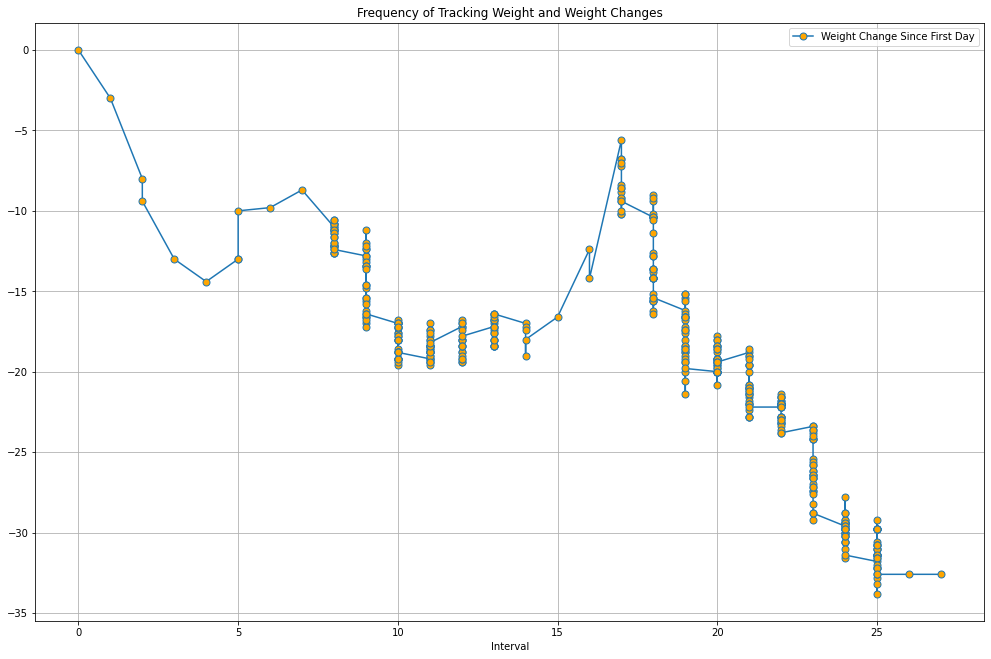

In [6]:
weight_study_period = ext_weight.plot.line(title="Frequency of Tracking Weight and Weight Changes", 
             x='Interval', y='Weight Change Since First Day',
             figsize=(17, 11), style='.-', grid=True,
             markevery=1, markersize=14, markerfacecolor='orange')

#### Confirmation

The graph confirms my belief that irregular tracking of weight results in weight gain on my part.  

Intervals 0 only has one weigh-in date and serves as my baseline weight. Intervals 1-4 "contradicts" my statement about irregular tracking and weight gain. During these intervals, I learned to eat healthily and eat smaller portions. I also put in a few light workouts. I lost weight! However, things turned around and my weight inched its way up again.

*Interval 5 is when the Apple Watch appeared*. It took me a while to learn how to use the watch effectively and consistently.

### Weight Changes In the Time of the Apple Watch

In this section, I use two-years worth of Apple Watch data to show how using the watch consistently and effectively improved my fitness and health. 

#### Setting up the Apple Watch Intervals

In [7]:
interval_activity_weights = pd.read_csv(f"{study_path}/start-end-weights-activity-intervals.csv")

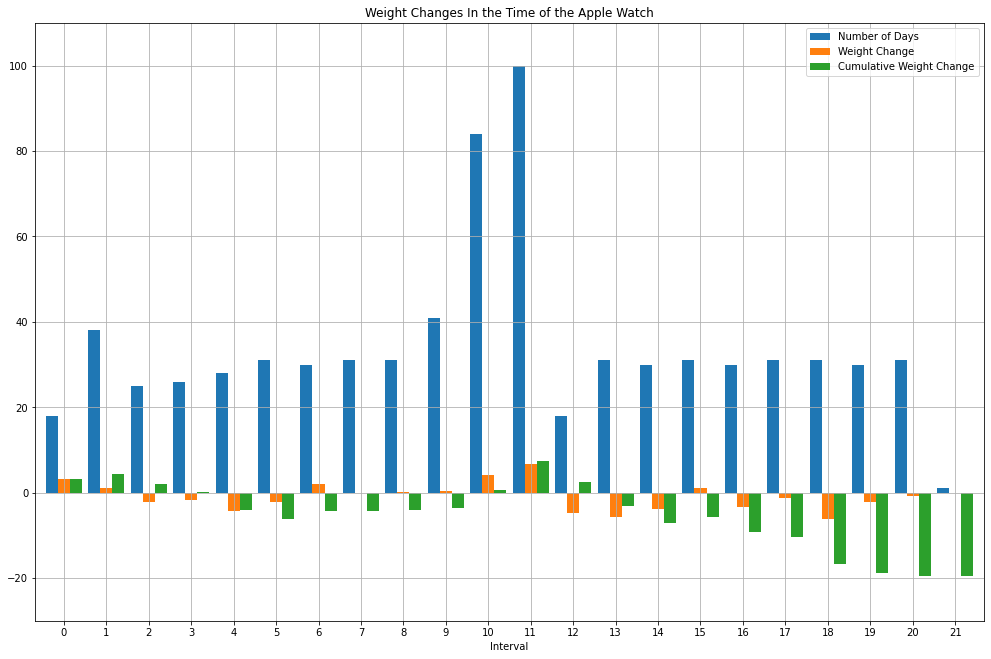

In [8]:
interval_weight_change_plot = interval_activity_weights.plot.bar(
    title="Weight Changes In the Time of the Apple Watch",
    x="Interval",
    y=["Number of Days", "Weight Change", "Cumulative Weight Change"],
    rot=0, grid=True,
    figsize=(17, 11), width=0.85, ylim=(-30, 110))

#### Closing All Rings Each Interval and Weight Changes

A month of closing all rings as shown in the iPhone Fitness App.


<img src="img/closed-rings.jpeg" width=320, height=240>


In [9]:
interval_activity_totals = pd.read_csv(f"{study_path}/month-intervals-activity-totals.csv")

In [10]:
interval_activity_totals_weight_changes = pd.merge(interval_activity_weights, 
                                                   interval_activity_totals, 
                                                   left_on="Interval", 
                                                   right_on="Interval")

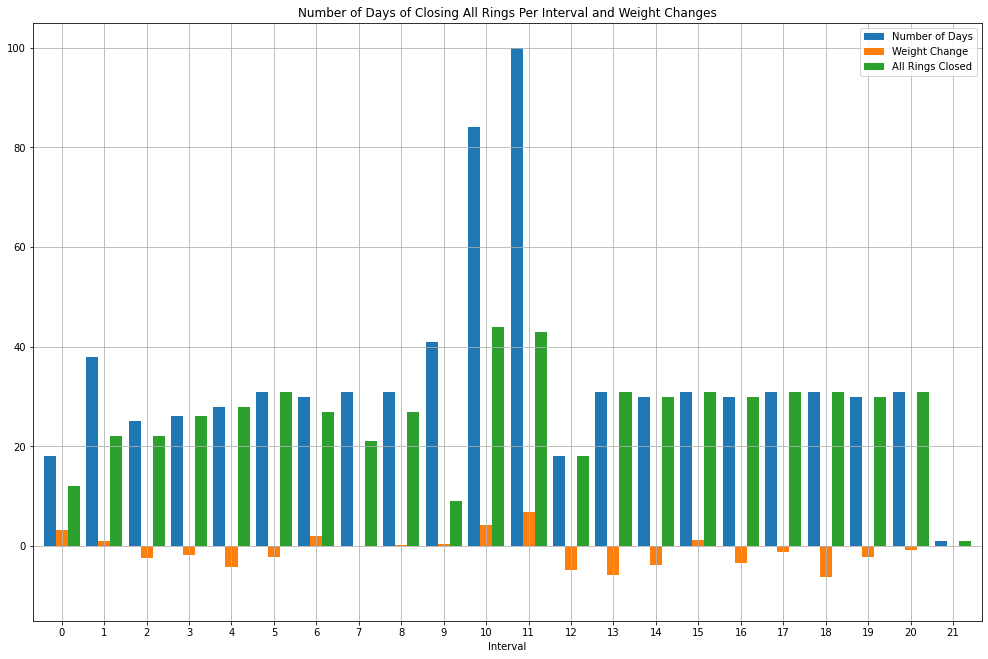

In [11]:
interval_allrings_closed_weight_changes_bar_plot = interval_activity_totals_weight_changes.plot.bar(
    title="Number of Days of Closing All Rings Per Interval and Weight Changes",
    y=["Number of Days", "Weight Change", "All Rings Closed"],
    x="Interval",
    rot=0, grid=True,
    figsize=(17, 11), width=0.85, ylim=(-15, 105))


Weight reduction happened for every interval that had daily closing of all rings (except for Interval 2 which had closed-rings 88% of the time). The opposite happens when closing all rings on a daily basis were not often.
 
Period 11 spurred me to close all of my daily rings as often as possible, which turned out to be every day from periods 12 to 20.

#### Closing Rings Frequency and Periods of Weight Gains

In [12]:
interval_closed_rings_weight_gains = \
interval_activity_totals_weight_changes.loc[interval_activity_totals_weight_changes[
    "Weight Change"] > 1, ["Interval", "Number of Days", "Weight Change", 
                           "Move Rings Closed", "Exercise Rings Closed", 
                           "Stand Rings Closed", "All Rings Closed"]]

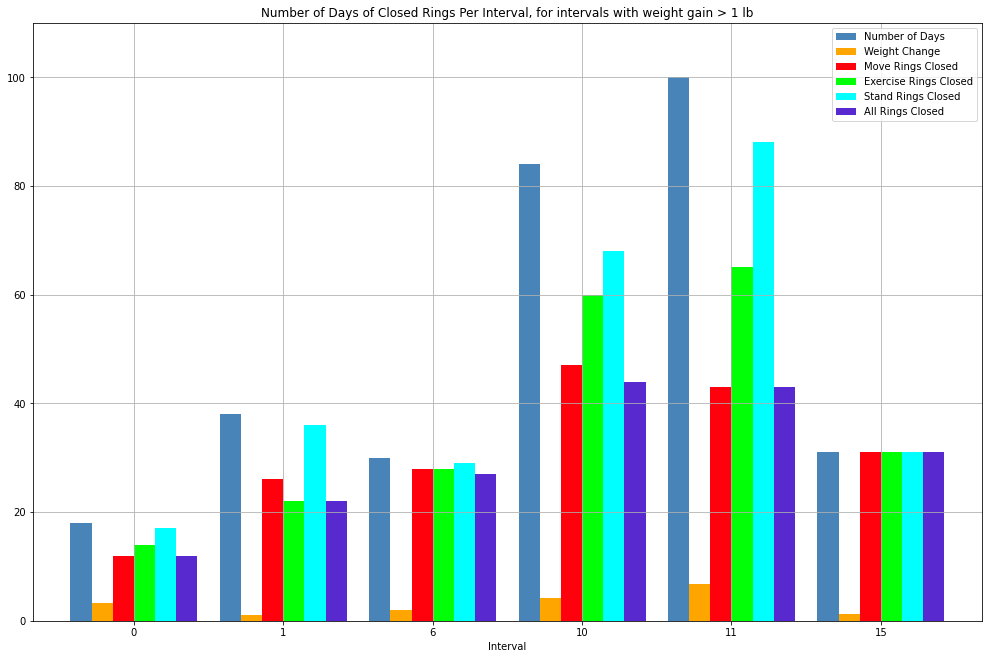

In [13]:
interval_closed_rings_weight_gain_bar_plot = interval_closed_rings_weight_gains.plot.bar(
    title="Number of Days of Closed Rings Per Interval, for intervals with weight gain > 1 lb",
    x="Interval",
    y=["Number of Days", "Weight Change", 
       "Move Rings Closed", "Exercise Rings Closed", "Stand Rings Closed", "All Rings Closed"],
    color=["#4984b8", "orange",  "#ff000d", "#01ff07", "cyan", "#5729ce"],
    figsize=(17, 11), width=0.85,
    ylim=(0, 110), rot=0, grid=True)

Standing and moving around after every hour of sitting is good practice. I like the stand ring feature. However, the stand ring has no bearing on weight reduction or weight maintenance, so it's not an important metric to me.

I can close my exercise ring very easily without burning many calories. All I need to do is walk for 30 minutes and I still will not come close to burning enough calories to  close my Move ring.

### The Move Ring is the One Ring to Rule Them All? 

In [14]:
interval_activity_averages = pd.read_csv(
    f"{study_path}/month-intervals-activity-averages.csv")

In [15]:
interval_activity_averages_weight_changes = pd.merge(interval_activity_weights, 
                                                     interval_activity_averages, 
                                                     left_on="Interval", 
                                                     right_on="Interval")

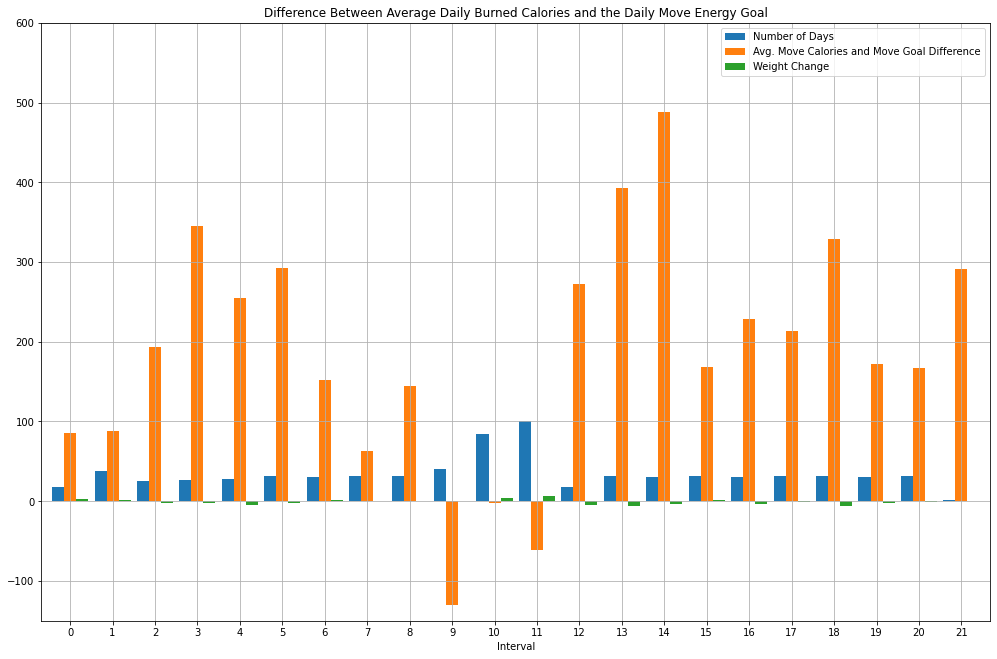

In [16]:
interval_activity_averages_weight_changes_bar_plot = interval_activity_averages_weight_changes.plot.bar(
    title="Difference Between Average Daily Burned Calories and the Daily Move Energy Goal",
    x="Interval",
    y=["Number of Days", "Avg. Move Calories and Move Goal Difference", "Weight Change"],
    figsize=(17, 11), width=0.85, 
    ylim=(-150, 600), rot=0, grid=True
)

In general, yes, closing many Move rings per interval usually results in a weight loss, or it maintains a very tight and small bound of gains and losses. The Move Ring is precious! 

A more accurate statement would be exceeding my daily Move Calories goal by close to 200 calories is a good way to lose or maintain my weight. Perhaps it's time to increase my daily Move calories goal by 150-200 calories. 

Some notes about the above graph:

1. Interval 9 should be ignored because my Apple Watch was not on my wrist for a few days. I had sent it to Apple for servicing. 

2. Intervals 10 and 11 have the most noticeable weight gain; both intervals show that on average, I did not meet my daily Move calories goal.

3. Burning more calories doesn't lead to higher weight reduction. Interval 14 expended the most number of calories in this study period. Interval 18 expended 4,452 calories less than Interval 14, but lost 2.4 pounds more tha Interval 14 did. A likely reason is diet. I began a food experiment in Interval 18, adding bittermelon and/or eggplant to my meals. 

4. Intervals 15 and 19's daily average Move calories expended are very close to each other. It was by design, so I can compare and contrast. The end of Interval 15 resulted in a weight gain of over a pound, while Interval 19 ended with loss of two pounds. Interval 19 continued the food/diet experiment of Interval 18. Another reason could be the way I burned my calories. Interval 15's physical activity was mostly walking, while Interval 19 involved 28 days of running. I will look at walking and running data in the future.

### Apple Watch Can Be A Good  and a Fun Tool

The data show that when I use the Apple Watch regularly to meet activity goals, it becomes an effective tool for improving my health. It is also a fun tool as I have been able to use the Watch data as opportunities to learn how to do data analysis and for writing software tools to process the data. 